In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_sales = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\sales-cars.csv', parse_dates=['Month'], index_col = 0)

In [6]:
df_sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


<AxesSubplot:xlabel='Month'>

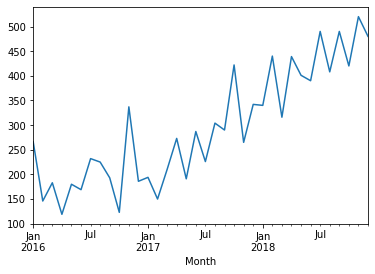

In [7]:
df_sales.Sales.plot()

Stationary Means the mean, variance and covariance are constant over time periods.

### Converting Series to Stationary

In [10]:
df_sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [14]:
df_sales_diff = df_sales.diff(periods=1) # Integrated of order 1 -> period 1 is for difference (diff) is the part of ARIMA model 
df_sales_diff = df_sales_diff[1:] ## Removing NAN form the first entry
df_sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


Plot of Non-Stationary Series

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

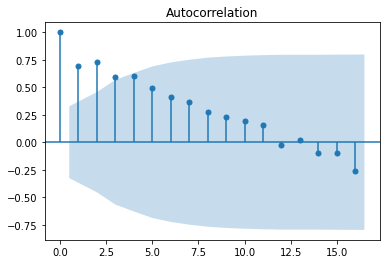

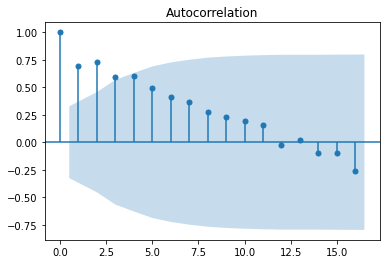

In [20]:
plot_acf(df_sales)

Plot of Stationary Series

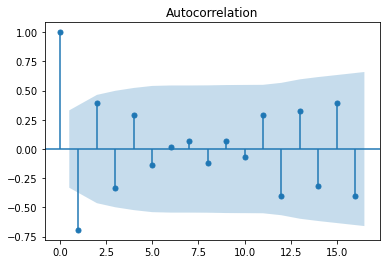

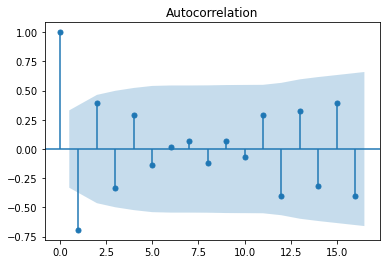

In [21]:
plot_acf(df_sales_diff)

<AxesSubplot:xlabel='Month'>

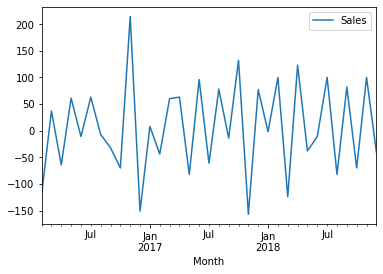

In [22]:
df_sales_diff.plot()

Train Test Split

In [65]:
X = df_sales.values
print("No if datapoints:",len(X))
train = X[0:27]
test = X[26:]
predictions = []

No if datapoints: 36


Autoregressive AR Model

In [23]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [29]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR

In [42]:
predictions = model_ar_fit.predict(start=27,end=36)

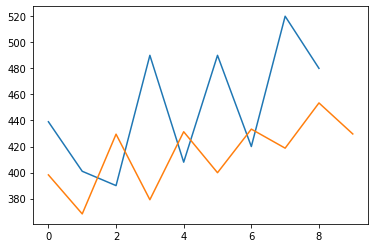

In [43]:
plt.plot(test)
plt.plot(predictions)

In [40]:
mean_squared_error(test, predictions)

4041.3105555505067

In [44]:
predictions

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544, 429.65174489])

ARIMA Model

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [71]:
# p,d,q
# p = Periods taken for AutoRegression Model (time difference)
# d = Integrated Order (Difference)
# q = No. Of periods in Moving Average
model_arima = ARIMA(train, order=(3,1,0)) 
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic) # We need to get less AIC value

294.854358421969


In [72]:
predictions_arima = model_arima_fit.forecast(steps=10)[0]
predictions_arima

array([393.12478111, 367.08437236, 432.19151918, 370.18099046,
       424.07773145, 400.33314081, 444.76740975, 412.54114691,
       450.35878424, 434.28258967])

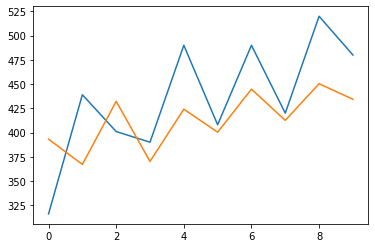

In [73]:
plt.plot(test)
plt.plot(predictions_arima)